In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [6]:
model = models.Sequential([
    layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 10, 10, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 788,682 (3.01 MB)

 Trainable params: 787,402 (3.00 MB)

 Non-trainable params: 1,280 (5.00 KB)

In [8]:
model.fit(x_train, y_train, epochs=15, batch_size=128, validation_split=0.1)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.8936 - loss: 0.3589 - val_accuracy: 0.4198 - val_loss: 1.9855
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9827 - loss: 0.0575 - val_accuracy: 0.9898 - val_loss: 0.0363
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9884 - loss: 0.0375 - val_accuracy: 0.9932 - val_loss: 0.0260
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9906 - loss: 0.0298 - val_accuracy: 0.9907 - val_loss: 0.0268
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9912 - loss: 0.0282 - val_accuracy: 0.9930 - val_loss: 0.0265
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9928 - loss: 0.0235 - val_accuracy: 0.9912 - val_loss: 0.0328
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9924 - loss: 0.0228 - val_accuracy: 0.9932 - val_loss: 0.0246
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9943 - loss: 0.0181 - val_

In [12]:

test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9932 - loss: 0.0294
Test Accuracy: 0.9951000213623047


**ACCURACY:99.5%**

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9960 - loss: 0.0117 - val_accuracy: 0.9933 - val_loss: 0.0263
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9963 - loss: 0.0108 - val_accuracy: 0.9947 - val_loss: 0.0220
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9969 - loss: 0.0087 - val_accuracy: 0.9943 - val_loss: 0.0256
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9978 - loss: 0.0078 - val_accuracy: 0.9943 - val_loss: 0.0244
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9974 - loss: 0.0078 - val_accuracy: 0.9950 - val_loss: 0.0242
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9973 - loss: 0.0074 - val_accuracy: 0.9942 - val_loss: 0.0254
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9975 - loss: 0.0086 - val_accuracy: 0.9938 - val_loss: 0.0253
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9976 - loss: 0.0078 - val_

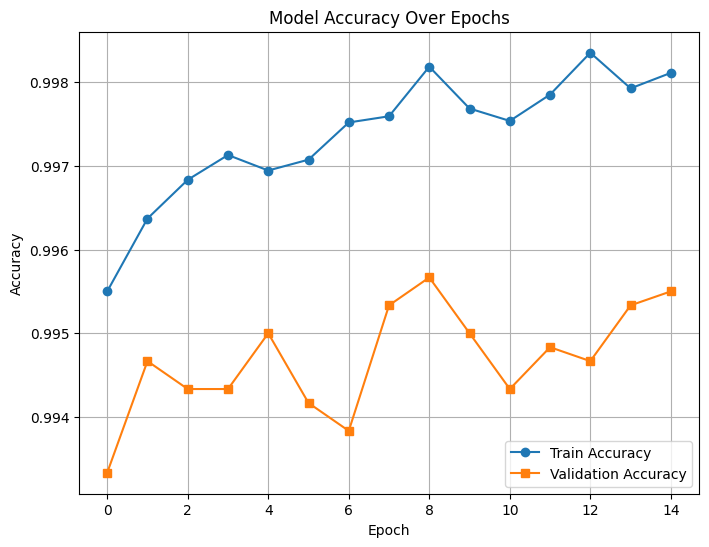

In [10]:
import matplotlib.pyplot as plt

history = model.fit(x_train, y_train,
                    epochs=15,
                    batch_size=128,
                    validation_split=0.1,
                    verbose=1)

plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


**I explored model building from basic DNNs to CNNs. I started with fully connected layers and saw their limitations on image data like MNIST. Moving to CNNs, I learned how convolution and pooling layers improve spatial feature extraction. I experimented with ReLU, dropout, and batch normalization to reduce overfitting. Gradually, I tried deeper models and observed how increasing dropout helped generalization. I also understood the role of ResNet and skip connections in training deeper networks effectively.**